In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df_suicides = pd.read_csv("suicidios_2010_a_2019_cleaned.csv")

In [126]:
df_suicides.head()

,Unnamed: 0,estado,ano,mes,DTOBITO,SEXO,RACACOR,CAUSABAS,LOCOCOR,age
0,1,AC,2010,1,2010-01-31,Masculino,Parda,X780,Via pública,11.0
1,2,SC,2010,4,2010-04-17,Masculino,Branca,X700,Domicílio,23.0
2,3,SC,2010,4,2010-04-21,Feminino,Branca,X700,Domicílio,43.0
3,4,SC,2010,4,2010-04-25,Masculino,Branca,X749,Hospital,22.0
4,5,SC,2010,5,2010-05-05,Feminino,Parda,X700,Domicílio,37.0


In [127]:
df_total_population_macro_regions = pd.read_csv("total_population_of_macro_regions_projection.csv")

In [128]:
df_total_population_macro_regions["macro-regiao"] = df_total_population_macro_regions["macro-regiao"].replace("Centro-O", "Centro-Oeste")

In [129]:
df_total_population_macro_regions.head()

,macro-regiao,populacao-total-2010,populacao-total-2011,populacao-total-2012,populacao-total-2013,populacao-total-2014,populacao-total-2015,populacao-total-2016,populacao-total-2017,populacao-total-2018,populacao-total-2019,populacao-total-2020,populacao-total-2021,populacao-total-2022
0,Centro-Oeste,14058094,14231008,14406049,14583244,14762618,14944198,15128012,15314086,15502449,15693130,15886155,16081555,16287809
1,Nordeste,53081950,53209346,53337049,53465058,53593374,53721998,53850931,53980173,54109725,54239589,54369764,54500251,54644582
2,Norte,15864454,15983437,16103313,16224088,16345768,16468361,16591874,16716313,16841686,16967998,17095258,17223473,17349619
3,Sudeste,80364410,80726049,81089317,81454218,81820762,82188956,82558806,82930321,83303507,83678373,84054926,84433173,84847187
4,Sul,27386891,27589553,27793716,27999390,28206585,28415314,28625587,28837417,29050813,29265790,29482356,29700526,29933315


In [130]:
populacao_total_por_coluna = df_total_population_macro_regions.iloc[:, 1:].sum()
df_populacao_total = populacao_total_por_coluna.to_frame(name='População Total')
df_populacao['Ano'] = df_populacao['Ano'].str.replace('populacao-total-', '')
df_populacao

,Ano,População Total
0,2010,190755799
1,2011,191739393
2,2012,192729444
3,2013,193725998
4,2014,194729107
5,2015,195738827
6,2016,196755210
7,2017,197778310
8,2018,198808180
9,2019,199844880


In [131]:
suicidios_por_ano = df_suicides.groupby('ano').size()
df_suicidios_por_ano = suicidios_por_ano.reset_index().rename(columns={0: 'Número de Suicídios'})
df_suicidios_por_ano_rename = df_suicidios_por_ano.rename(columns={'ano': 'Ano'})
df_suicidios_por_ano_rename

,Ano,Número de Suicídios
0,2010,9379
1,2011,9780
2,2012,10267
3,2013,10457
4,2014,10588
5,2015,11103
6,2016,11358
7,2017,12409
8,2018,12638
9,2019,13426


In [132]:
df_populacao['Ano'] = df_populacao['Ano'].astype(str)
df_suicidios_por_ano_rename['Ano'] = df_suicidios_por_ano_rename['Ano'].astype(str)

df_merge_pop_total_suicides_total = pd.merge(df_populacao, df_suicidios_por_ano_rename, on='Ano')
df_merge_pop_total_suicides_total                                      

,Ano,População Total,Número de Suicídios
0,2010,190755799,9379
1,2011,191739393,9780
2,2012,192729444,10267
3,2013,193725998,10457
4,2014,194729107,10588
5,2015,195738827,11103
6,2016,196755210,11358
7,2017,197778310,12409
8,2018,198808180,12638
9,2019,199844880,13426


# Suicide rate per year

In [133]:
df_merge_pop_total_suicides_total['Taxa de Suicídio'] = (df_merge_pop_total_suicides_total  ['Número de Suicídios'] / df_merge_pop_total_suicides_total  ['População Total']) * 100000

In [134]:
df_merge_pop_total_suicides_total

,Ano,População Total,Número de Suicídios,Taxa de Suicídio
0,2010,190755799,9379,4.916757
1,2011,191739393,9780,5.100673
2,2012,192729444,10267,5.327157
3,2013,193725998,10457,5.397830
4,2014,194729107,10588,5.437297
5,2015,195738827,11103,5.672354
6,2016,196755210,11358,5.772655
7,2017,197778310,12409,6.274197
8,2018,198808180,12638,6.356881
9,2019,199844880,13426,6.718211


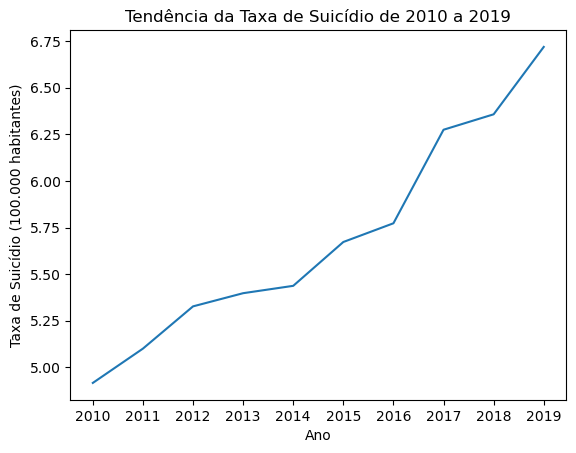

In [135]:
import matplotlib.pyplot as plt

plt.plot(df_merge_pop_total_suicides_total['Ano'], df_merge_pop_total_suicides_total['Taxa de Suicídio'])

plt.xlabel('Ano')
plt.ylabel('Taxa de Suicídio (100.000 habitantes)')


plt.title('Tendência da Taxa de Suicídio de 2010 a 2019')

plt.show()